In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('bank.csv',sep=';')

In [12]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
df.shape

(4521, 17)

# Data Visualization

<Axes: xlabel='age', ylabel='Count'>

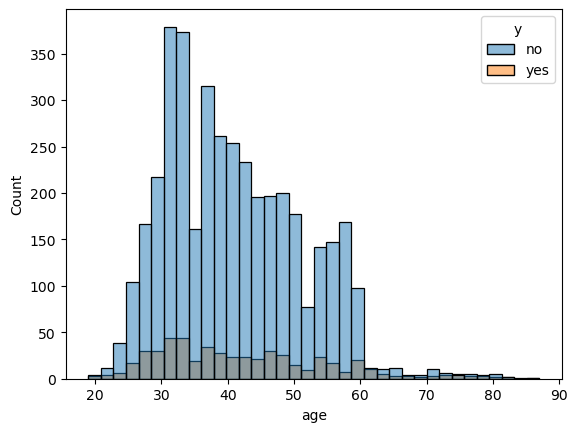

In [21]:
sns.histplot(data=df,x='age',hue='y')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'services'),
  Text(2, 0, 'management'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'admin.'),
  Text(8, 0, 'student'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'retired'),
  Text(11, 0, 'unknown')])

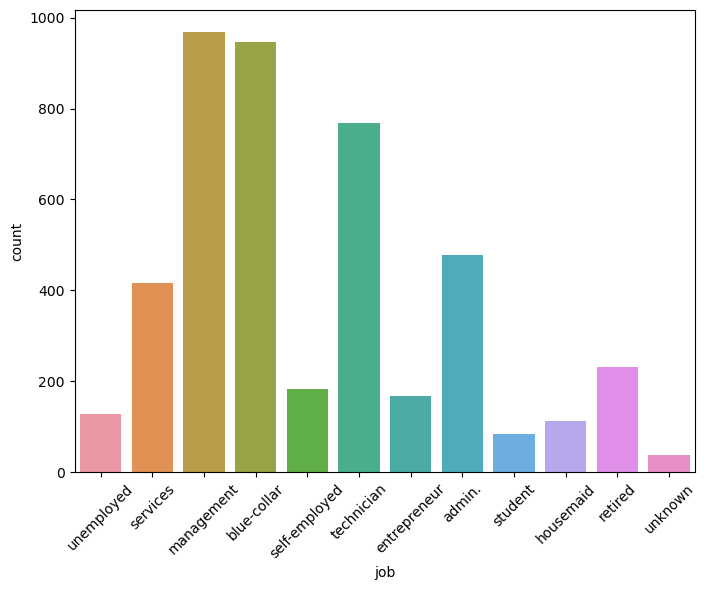

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='job')
plt.xticks(rotation=45)

Text(0.5, 0, 'education status')

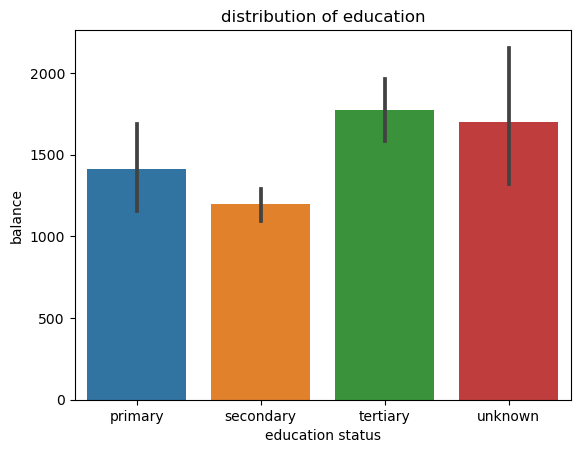

In [35]:
sns.barplot(data=df,x='education',y='balance')
plt.title('distribution of education')
plt.xlabel('education status')

Text(0.5, 0, 'marital status')

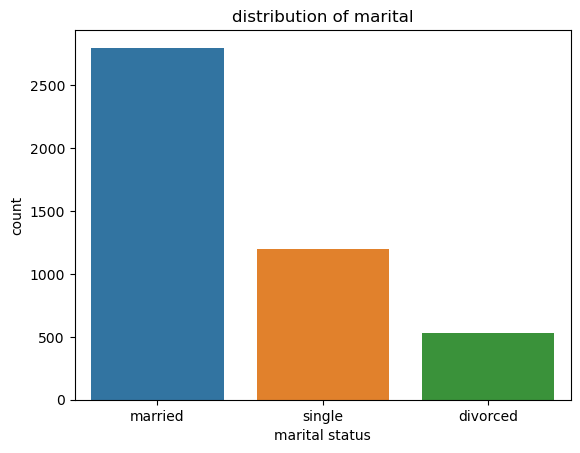

In [34]:
sns.countplot(data=df,x='marital')
plt.title('distribution of marital')
plt.xlabel('marital status')

Text(0.5, 0, 'Purchase (y)')

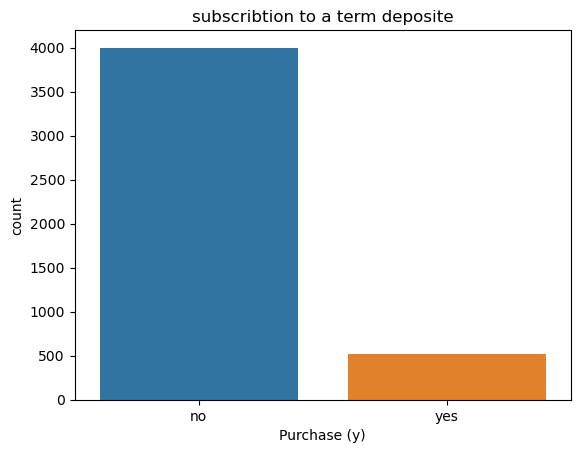

In [33]:
plt.title('subscribtion to a term deposite')
sns.countplot(data=df,x='y')
plt.xlabel('Purchase (y)')

<Axes: title={'center': 'distribution of housing loan'}, xlabel='housing', ylabel='count'>

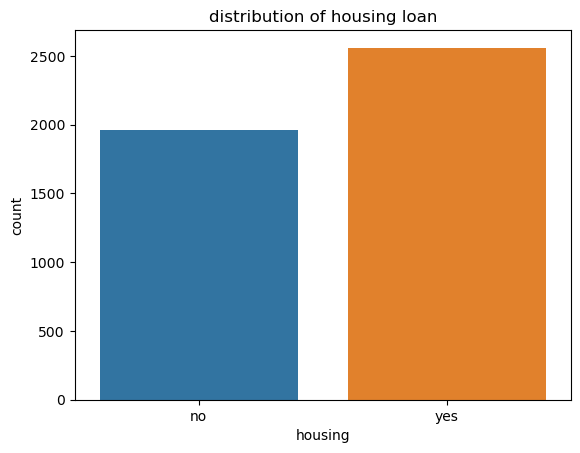

In [37]:
plt.title('distribution of housing loan')
sns.countplot(data=df,x='housing')

<Axes: title={'center': 'distribution of personal loan'}, xlabel='loan', ylabel='count'>

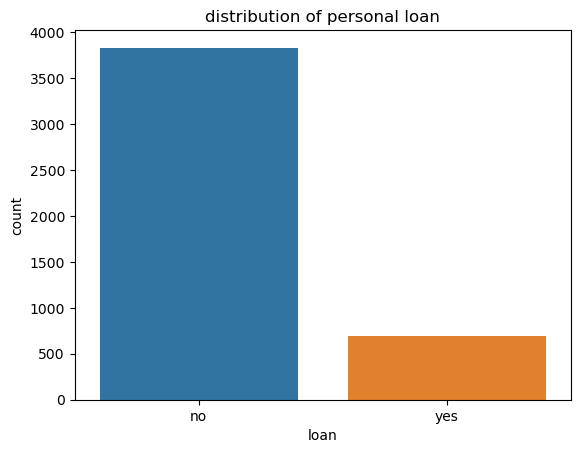

In [38]:
plt.title('distribution of personal loan')
sns.countplot(data=df,x='loan')

# Machine learning

In [39]:
df=pd.get_dummies(df)

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree



In [42]:
!pip install matplotlib
!pip install matplotlib scikit-learn

In [47]:
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [48]:
x=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y=df['y_yes']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pre=clf.predict(x_test)
print(classification_report(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       807
           1       0.36      0.37      0.37        98

    accuracy                           0.86       905
   macro avg       0.64      0.64      0.64       905
weighted avg       0.86      0.86      0.86       905



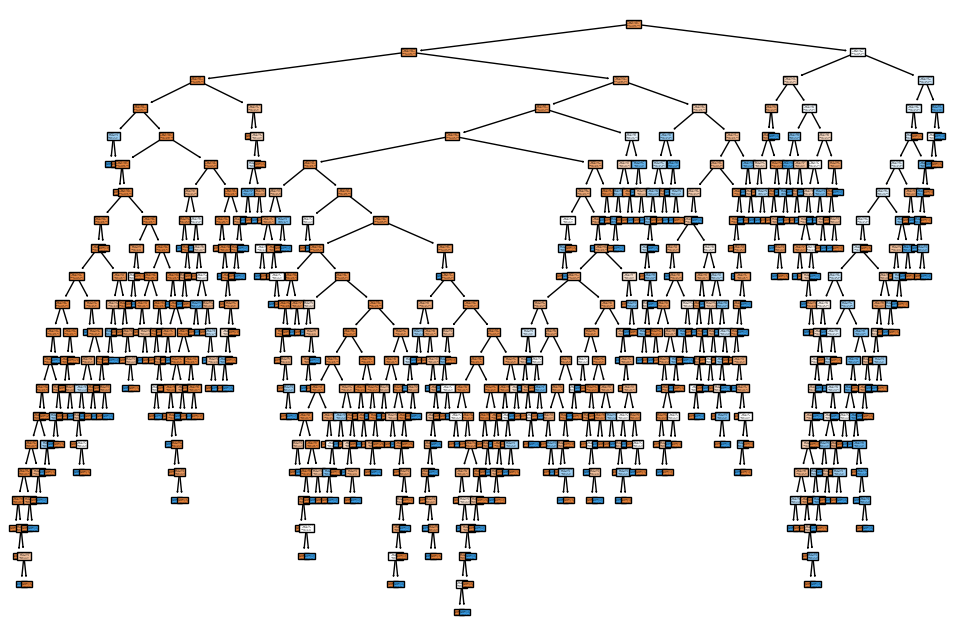

In [52]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=list(x.columns), class_names=['No','Yes'],filled=True)
plt.show()


In [53]:
importances=clf.feature_importances_
feature_names=x.columns
feature_importance=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
print(feature_importance)

    Feature  Importance
3  duration    0.315907
1   balance    0.210347
0       age    0.161218
5     pdays    0.130279
2       day    0.112888
4  campaign    0.046162
6  previous    0.023199


In [54]:
param_grid={'max_depth':[None,5,10,15],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [55]:
best_params=grid_search.best_params_
clf=DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [56]:
y_pred=clf.predict(x_test)

In [57]:
clf_tuned=DecisionTreeClassifier(**best_params)
clf_tuned.fit(x_train,y_train)
y_pred_tuned=clf_tuned.predict(x_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test,y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.54      0.35      0.42        98

    accuracy                           0.90       905
   macro avg       0.73      0.66      0.68       905
weighted avg       0.88      0.90      0.89       905



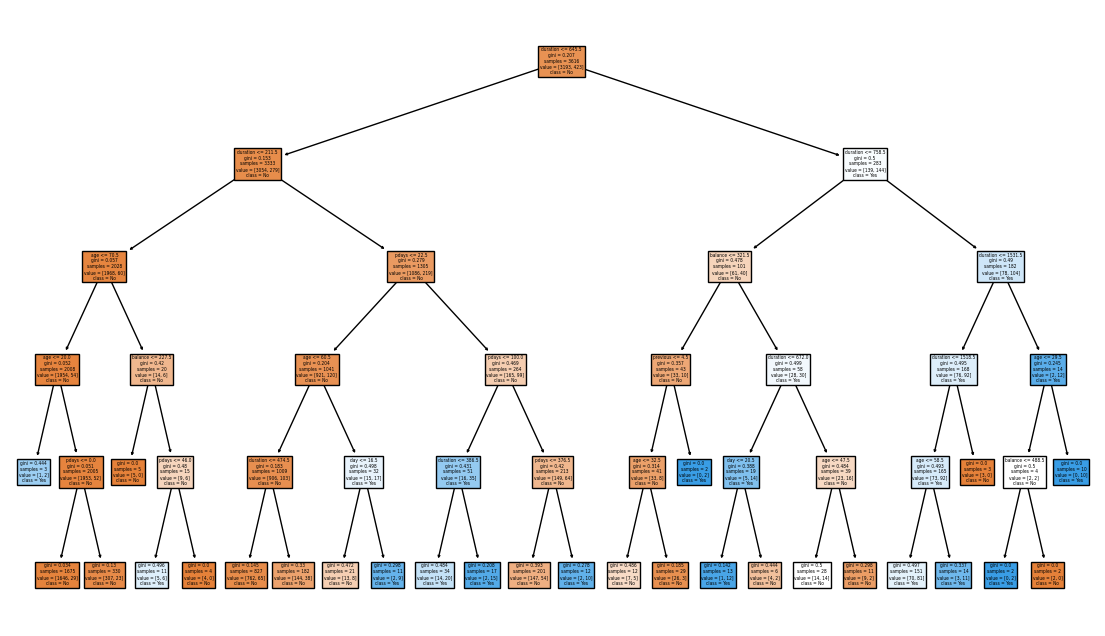

In [61]:
plt.figure(figsize=(14,8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=list(x.columns), class_names=['No','Yes'], filled=True)
plt.show()